# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** \
**Email:**

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

Observed 9 sixes out of 10 rolls
P(A | 9 sixes) = 0.000
P(B | 9 sixes) = 0.003
P(C | 9 sixes) = 0.997
True die: C


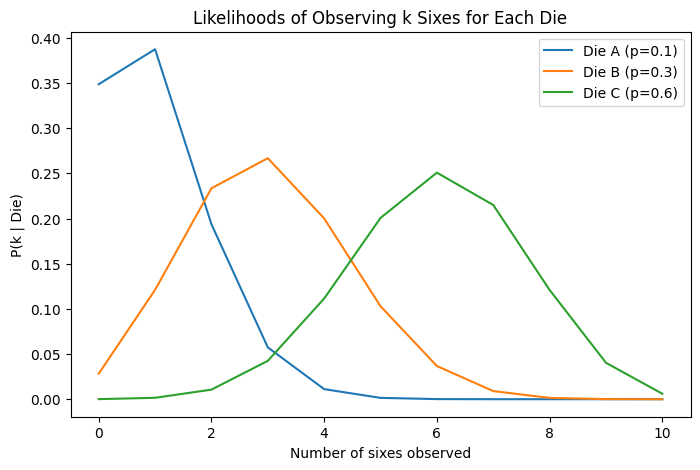

Accuracy over 100 rounds: 0.75


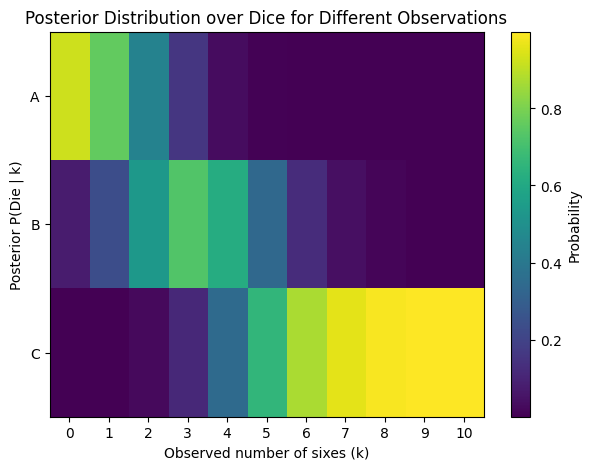

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = 1/3
n_rolls = 10

# k = observed sixes for 10 rolls

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

def simulate_round():
    true_die = random.choice(dice_names)
    p = dice_probs[true_die]
    k = np.random.binomial(n_rolls, p) # choose k (number of sixes in 10 rolls) based on the chosen dice's bias

    return true_die, k

def posterior_given_k(k):
    numerators = []
    for dice, prob in dice_probs.items():
        likelihood = binomial_prob(n_rolls, k, prob)
        numerators.append(likelihood * prior)
    numerators = np.array(numerators)
    posterior = numerators / numerators.sum()
    
    return posterior


# Example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

# Accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [ ]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]
# theta = (X^TX)^-1 X^Ty
theta = np.linalg.pinv(X.T @ X) @ (X.T @ y)
y_pred = X @ theta 
mse_linear = np.mean((y - y_pred)**2)
print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [5. 0.] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

Step 1: w=12.6

Step 2: w=12.395199999999999

Step 3: w=12.2594063671296

Step 4: w=12.15952886826822

Step 5: w=12.081579122880262

Step 1: w=12.99996

Step 2: w=12.999920002399952

Step 3: w=12.999880007199616

Step 4: w=12.999840014398751

Step 5: w=12.99980002399712



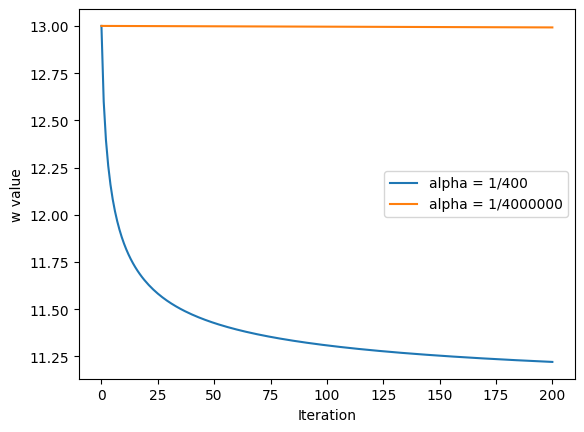

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# def f(w):
#     return 5*(w-11)**4

def grad_f(w):
    return 20*(w-11)**3

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    w = w0
    history_w = [w]
    
    # Training with gradient descent
    for step in range(steps):
        w -= alpha * grad_f(w)
        history_w.append(w)

        if (step < 5):
            print(f"Step {step+1}: w={w}\n")
    return np.array(history_w)

    
# Run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

# Print and Plot
plt.plot(hist_140, label="alpha = 1/400")
plt.plot(hist_180, label="alpha = 1/4000000")
plt.xlabel("Iteration")
plt.ylabel("w value")
plt.legend()
plt.show()


ALL THE BEST!